In [178]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns


# **Data Preprocessing**

In [179]:
insurance = pd.read_csv("insurance.csv")

In [180]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [181]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [182]:
insurance.shape

(1338, 7)

In [183]:
print("number of rows----->>>", insurance.shape[0])
print("number of columns----->>>", insurance.shape[1])

number of rows----->>> 1338
number of columns----->>> 7


In [184]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [185]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [186]:
insurance.describe()#(include="all")

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **EDA**

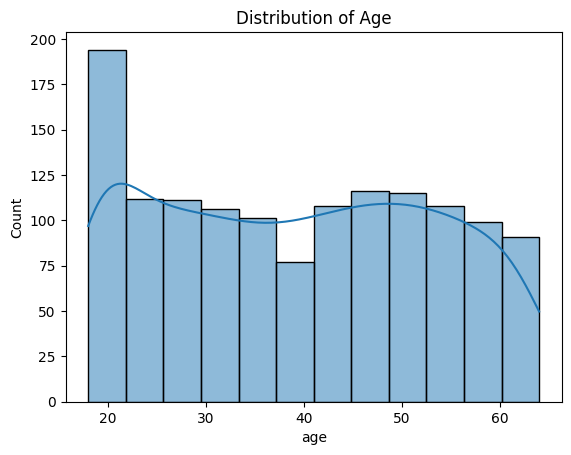

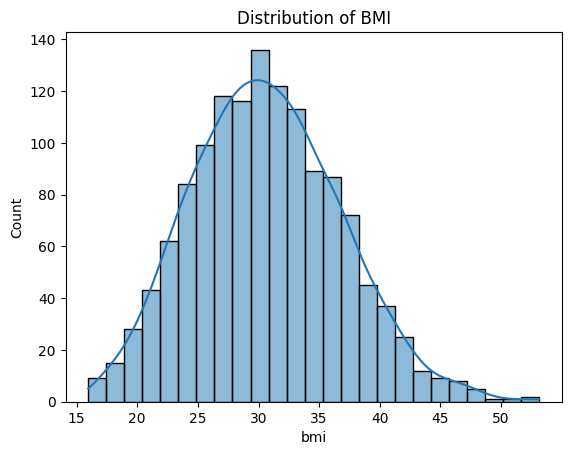

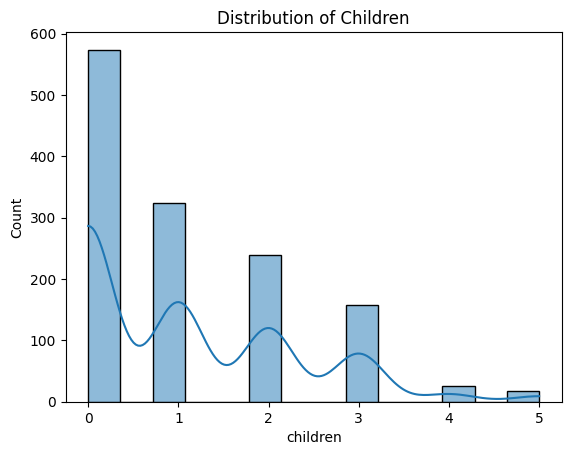

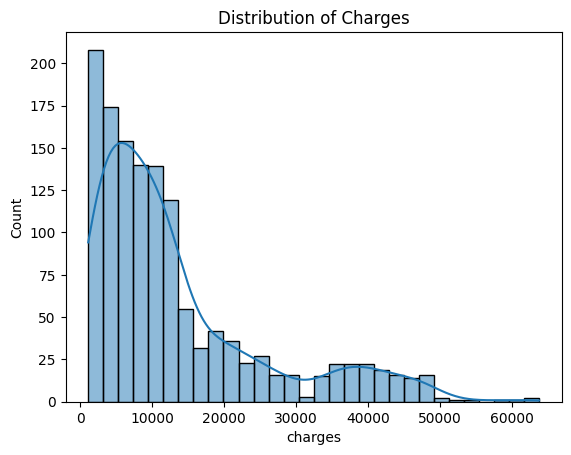

In [187]:
import matplotlib.pyplot as plt

# Distribution plot for 'age'
sns.histplot(insurance['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution plot for 'bmi'
sns.histplot(insurance['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

# Distribution plot for 'children'
sns.histplot(insurance['children'], kde=True)
plt.title('Distribution of Children')
plt.show()

# Distribution plot for 'charges'
sns.histplot(insurance['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()


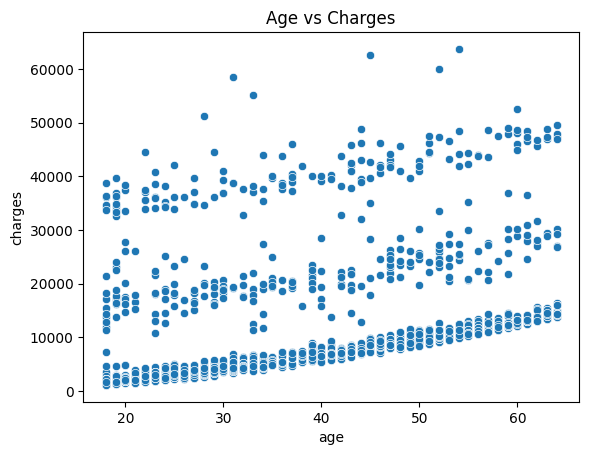

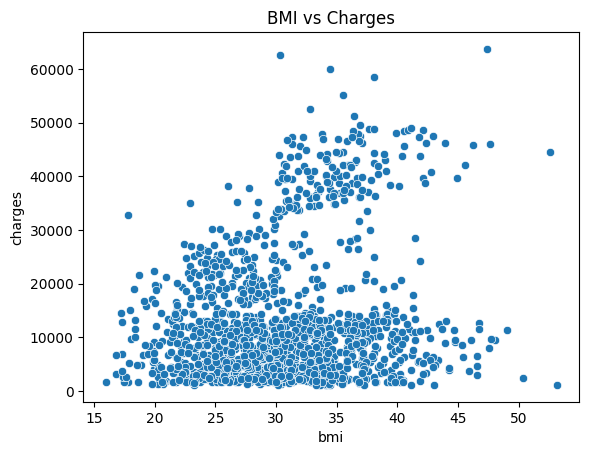

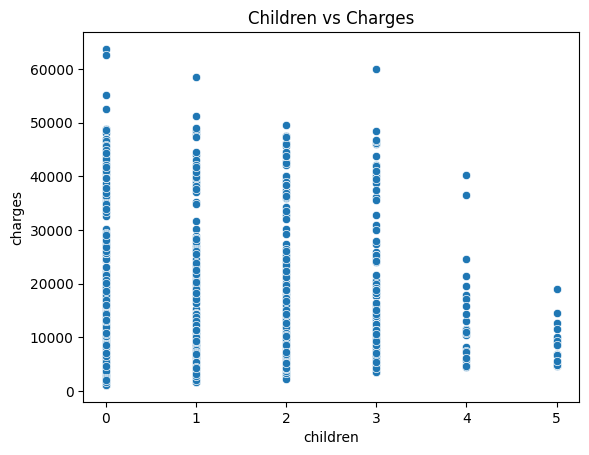

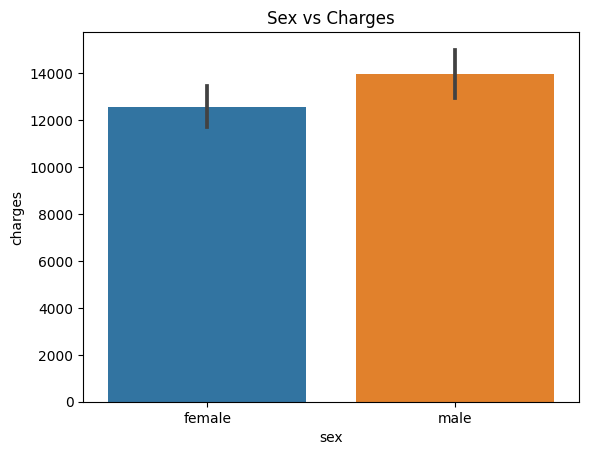

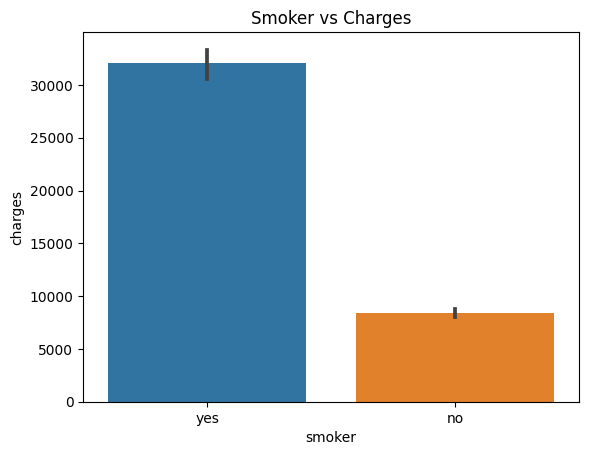

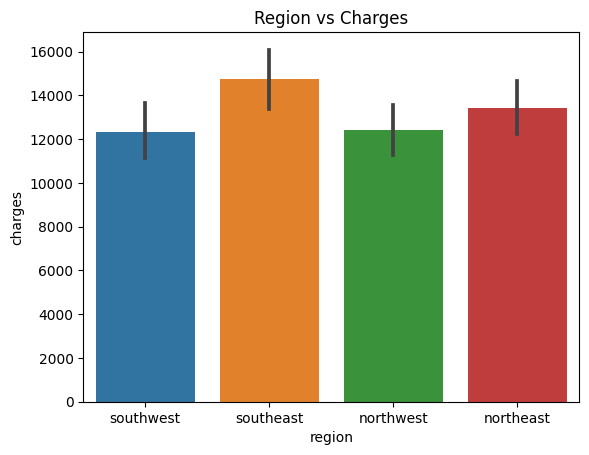

In [188]:
# Scatter plot for 'age' vs 'charges'
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title('Age vs Charges')
plt.show()

# Scatter plot for 'bmi' vs 'charges'
sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.title('BMI vs Charges')
plt.show()

# Scatter plot for 'children' vs 'charges'
sns.scatterplot(x='children', y='charges', data=insurance)
plt.title('Children vs Charges')
plt.show()


# Bar plot for 'sex' vs 'charges'
sns.barplot(x='sex', y='charges', data=insurance)
plt.title('Sex vs Charges')
plt.show()

# Bar plot for 'smoker' vs 'charges'
sns.barplot(x='smoker', y='charges', data=insurance)
plt.title('Smoker vs Charges')
plt.show()

# Bar plot for 'region' vs 'charges'
sns.barplot(x='region', y='charges', data=insurance)
plt.title('Region vs Charges')
plt.show()


# **Encoding**

In [189]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [190]:
insurance['sex'] = insurance['sex'].map({'female':0, 'male':1})

In [191]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [192]:
insurance['smoker'] = insurance['smoker'].map({'yes':0, 'no':1})

In [193]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [194]:
insurance['region'] = insurance['region'].map({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})


# **split the data**

In [195]:
X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
X_train,
#y_train

(      age  sex     bmi  children  smoker  region
 560    46    0  19.950         2       1       3
 1285   47    0  24.320         0       1       4
 1142   52    0  24.860         0       1       1
 969    39    0  34.320         5       1       1
 486    54    0  21.470         3       1       3
 ...   ...  ...     ...       ...     ...     ...
 1095   18    0  31.350         4       1       4
 1130   39    0  23.870         5       1       1
 1294   58    1  25.175         0       1       4
 860    37    0  47.600         2       0       2
 1126   55    1  29.900         0       1       2
 
 [1070 rows x 6 columns],)

In [199]:
# Support Vector Machines (SVM)
from sklearn.svm import SVR

# Linear Regression
from sklearn.linear_model import LinearRegression

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor


In [200]:
# Create an SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Create a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Create a Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [201]:
y_pred1 = svm_model.predict(X_test)
y_pred2 = linear_model.predict(X_test)
y_pred3 = random_forest_model.predict(X_test)
y_pred4 = gradient_boosting_model.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test,
                    'svm_model': y_pred1,
                    'linear_model': y_pred2,
                    'random_forest': y_pred3,
                    'gradient_boosting': y_pred4})

In [202]:
df1

,Actual,svm_model,linear_model,random_forest,gradient_boosting
764,9095.06825,9548.085592,8856.651536,10831.257563,10811.964678
887,5272.17580,9492.021724,7101.882358,5346.847064,5710.326610
890,29330.98315,9649.068738,36893.618988,28218.945292,27975.053777
1293,9301.89355,9554.922841,9470.364241,10385.522879,9769.965527
259,33750.29180,9419.727391,27035.848445,34365.583997,33571.934317
...,...,...,...,...,...
109,47055.53210,9649.086168,38918.765285,47135.412360,46190.330774
575,12222.89830,9625.689061,11780.420912,12210.830145,12766.157885
535,6067.12675,9503.728817,7584.912388,6428.294672,6994.841865
543,63770.42801,9605.011962,40806.644525,46905.755190,47895.118957


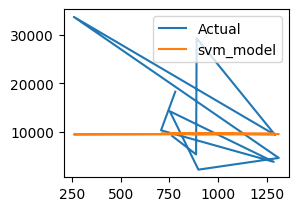

In [203]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm_model'].iloc[0:11], label = 'svm_model')
plt.legend()


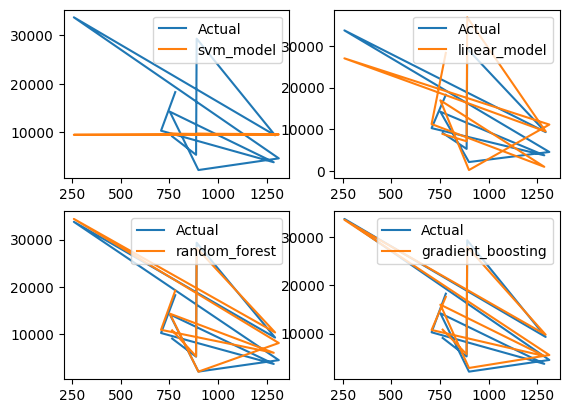

In [204]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm_model'].iloc[0:11], label = 'svm_model')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['linear_model'].iloc[0:11], label = 'linear_model')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['random_forest'].iloc[0:11], label = 'random_forest')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['gradient_boosting'].iloc[0:11], label = 'gradient_boosting')
plt.legend()

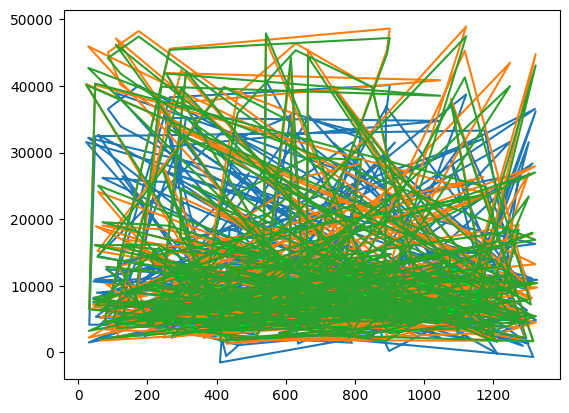

In [205]:
plt.plot(df1['linear_model'], label = 'linear_model')
plt.plot(df1['random_forest'], label = 'random_forest')
plt.plot(df1['gradient_boosting'], label = 'gradient_boosting')

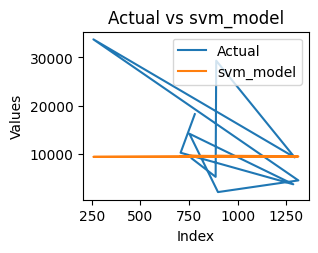

In [206]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['svm_model'].iloc[0:11], label='svm_model')
plt.legend()
plt.title('Actual vs svm_model')
plt.xlabel('Index')
plt.ylabel('Values')

# If you want to show the plot
plt.show()


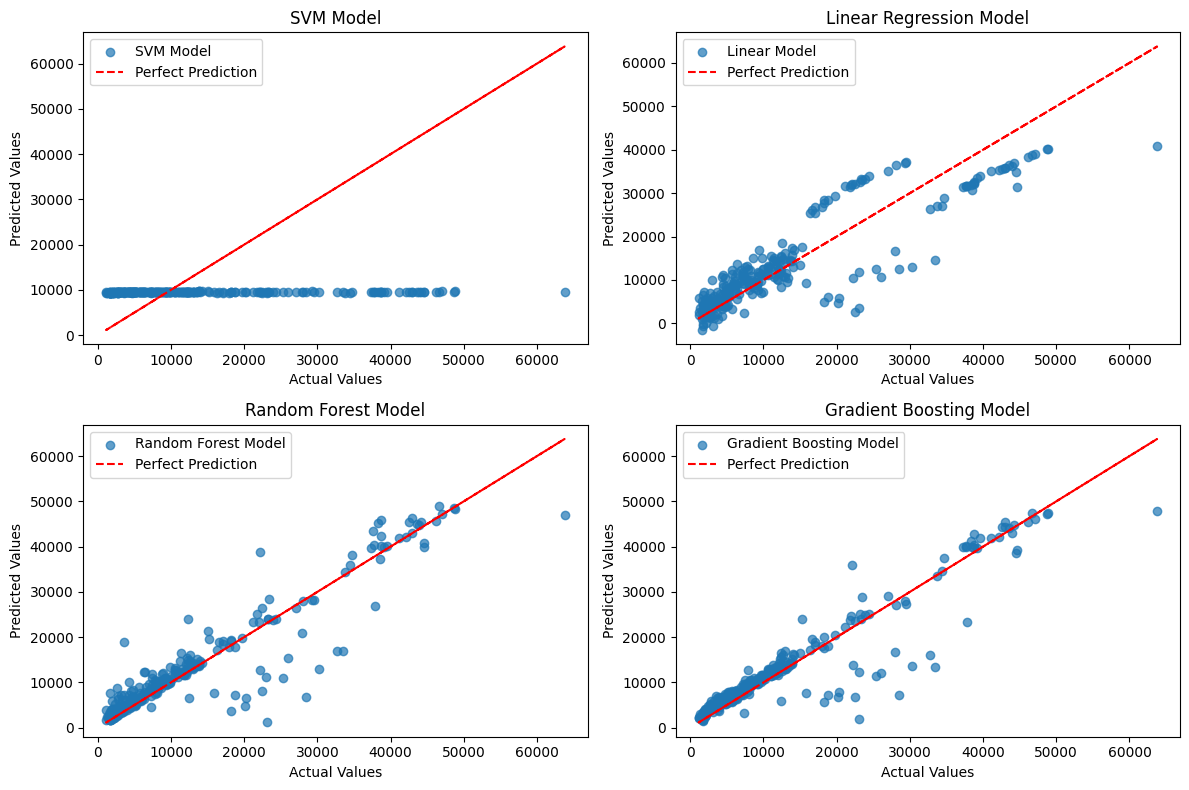

In [207]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Subplot for SVM model
axes[0, 0].scatter(df1['Actual'], df1['svm_model'], label='SVM Model', alpha=0.7)
axes[0, 0].plot(df1['Actual'], df1['Actual'], color='red', linestyle='--', label='Perfect Prediction')
axes[0, 0].set_title('SVM Model')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].legend()

# Subplot for Linear Regression model
axes[0, 1].scatter(df1['Actual'], df1['linear_model'], label='Linear Model', alpha=0.7)
axes[0, 1].plot(df1['Actual'], df1['Actual'], color='red', linestyle='--', label='Perfect Prediction')
axes[0, 1].set_title('Linear Regression Model')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].legend()

# Subplot for Random Forest model
axes[1, 0].scatter(df1['Actual'], df1['random_forest'], label='Random Forest Model', alpha=0.7)
axes[1, 0].plot(df1['Actual'], df1['Actual'], color='red', linestyle='--', label='Perfect Prediction')
axes[1, 0].set_title('Random Forest Model')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].legend()

# Subplot for Gradient Boosting model
axes[1, 1].scatter(df1['Actual'], df1['gradient_boosting'], label='Gradient Boosting Model', alpha=0.7)
axes[1, 1].plot(df1['Actual'], df1['Actual'], color='red', linestyle='--', label='Perfect Prediction')
axes[1, 1].set_title('Gradient Boosting Model')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# **Evaluvation metrics**

In [208]:
from sklearn import metrics

In [209]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [210]:
print(score1, score2, score3, score4)

-0.07229115487222826 0.7839279776463969 0.8666635971729288 0.8790369691005526


In [211]:
m1 = metrics.mean_absolute_error(y_test, y_pred1)
m2 = metrics.mean_absolute_error(y_test, y_pred2)
m3 = metrics.mean_absolute_error(y_test, y_pred3)
m4 = metrics.mean_absolute_error(y_test, y_pred4)

print(m1, m2, m3, m4)

8592.182255501126 4174.0478764864665 2441.1314256953096 2397.8517326012475


**PREDICT NEWCUSTOMER**

In [212]:
data = {'age' : 28,
        'sex' : 1,
        'bmi' : 42.60,
        'children' : 4,
        'smoker' : 1,
        'region' : 2
        }

df = pd.DataFrame(data, index = [0])
df

,age,sex,bmi,children,smoker,region
0,28,1,42.6,4,1,2


In [213]:
new_cus = gradient_boosting_model.predict(df)
new_cus

array([7220.18831679])

**SAVE MODEL**

In [214]:
xgb = GradientBoostingRegressor()
xgb.fit(X, y)

GradientBoostingRegressor()

In [215]:
import joblib

In [216]:
joblib.dump(xgb,'model_joblib_xgb')

['model_joblib_xgb']

In [217]:
model = joblib.load('model_joblib_xgb')

In [218]:
model.predict(df)

array([5689.71061116])

# **GUI**

In [223]:
from tkinter import *

In [220]:
import joblib

In [226]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
# Assuming you have already trained your models (svm_model, linear_model, random_forest_model, gradient_boosting_model)

# Create a sample DataFrame for input features
sample_data = {'age': [28],
               'sex': [1],
               'bmi': [42.60],
               'children': [4],
               'smoker': [1],
               'region': [2]}

df_input = pd.DataFrame(sample_data)

# Function to get predictions
def get_predictions():
    input_values = {
        'age': int(age_var.get()),
        'sex': int(sex_var.get()),
        'bmi': float(bmi_var.get()),
        'children': int(children_var.get()),
        'smoker': int(smoker_var.get()),
        'region': int(region_var.get())
    }

    # Create a DataFrame with the input values
    input_df = pd.DataFrame(input_values, index=[0])

    # Make predictions using the trained models
    svm_prediction = svm_model.predict(input_df)
    linear_prediction = linear_model.predict(input_df)
    random_forest_prediction = random_forest_model.predict(input_df)
    gradient_boosting_prediction = gradient_boosting_model.predict(input_df)

    # Update the result labels
    result_label_svm.config(text=f"SVM Prediction: {svm_prediction[0]:.2f}")
    result_label_linear.config(text=f"Linear Prediction: {linear_prediction[0]:.2f}")
    result_label_rf.config(text=f"Random Forest Prediction: {random_forest_prediction[0]:.2f}")
    result_label_gb.config(text=f"Gradient Boosting Prediction: {gradient_boosting_prediction[0]:.2f}")

# Create Tkinter window
window = tk.Tk()
window.title("Model Predictions")

# Create labels and entry widgets for input features
labels = ['Age:', 'Sex:', 'BMI:', 'Children:', 'Smoker:', 'Region:']
entries = []

for i, label_text in enumerate(labels):
    label = ttk.Label(window, text=label_text)
    label.grid(row=i, column=0, padx=5, pady=5, sticky='e')

    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Set default values in entry widgets
entries[0].insert(0, '28')
entries[1].insert(0, '1')
entries[2].insert(0, '42.60')
entries[3].insert(0, '4')
entries[4].insert(0, '1')
entries[5].insert(0, '2')

# Button to get predictions
predict_button = ttk.Button(window, text='Get Predictions', command=get_predictions)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Labels to display predictions
result_label_svm = ttk.Label(window, text="SVM Prediction: ")
result_label_svm.grid(row=len(labels) + 1, column=0, columnspan=2)

result_label_linear = ttk.Label(window, text="Linear Prediction: ")
result_label_linear.grid(row=len(labels) + 2, column=0, columnspan=2)

result_label_rf = ttk.Label(window, text="Random Forest Prediction: ")
result_label_rf.grid(row=len(labels) + 3, column=0, columnspan=2)

result_label_gb = ttk.Label(window, text="Gradient Boosting Prediction: ")
result_label_gb.grid(row=len(labels) + 4, column=0, columnspan=2)

# Run the Tkinter event loop
window.mainloop()
